In [1]:
import copy
import linecache
import os
import pickle
from itertools import product
from time import gmtime, process_time, strftime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from scipy.optimize import curve_fit
from scipy.stats import zscore

from util_functions import * 

distance    = 831.
e_distance  = 11.

df_photometry = pd.read_csv('data/example_photomety_file.csv', engine='python')
star_list     = df_photometry.name

# Double star fitting - Example 1
Using A component fitted by `binary_SED_fitting`

## Loading the SingleStar object and creating a BinaryStar

In [3]:
cycle=1
single_2002 = load_SingleStar('WOCS2002', cycle)

binary_2002 = single_2002.to_BinaryStar(model_to_fit_B  = 'Koester', 
                                        free_para       = 4,
                                        filters_to_drop = ['GALEX/GALEX.NUV','WISE/WISE.W2','KPNO/Mosaic.I','GAIA/GAIA3.Grvs'],
                                        verbose         = False) 


## Chi2 fitting and plotting

    Calculating noisy chi2:  99/100  (99%)    WARNING: Best fit logg is at lower limit of the model.
    WARNING! Median of noisy "Te" is not same as "Te".


C:\Users\user\Documents\GitHub\Binary_SED_fitting_3.3.0\util_functions.py:2266: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes[1,1].set_ylim(self.R_B-5*self.R_error_lower_B, self.R_B+5*self.R_error_upper_B)


    Saving log in log_binary_fitting.csv


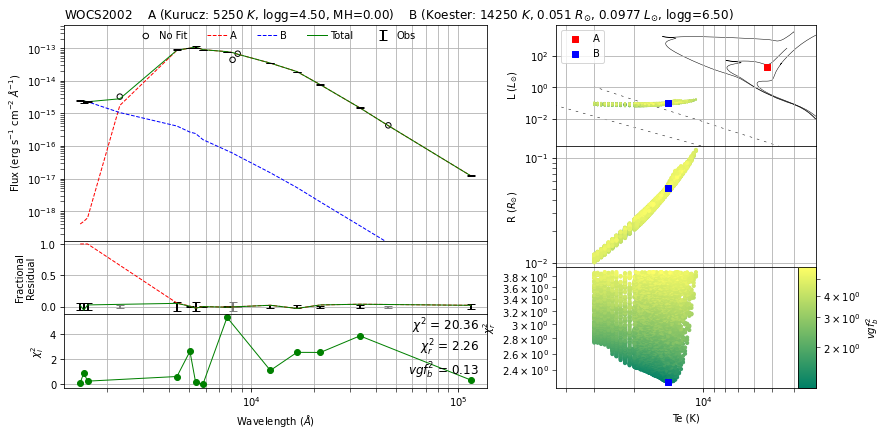

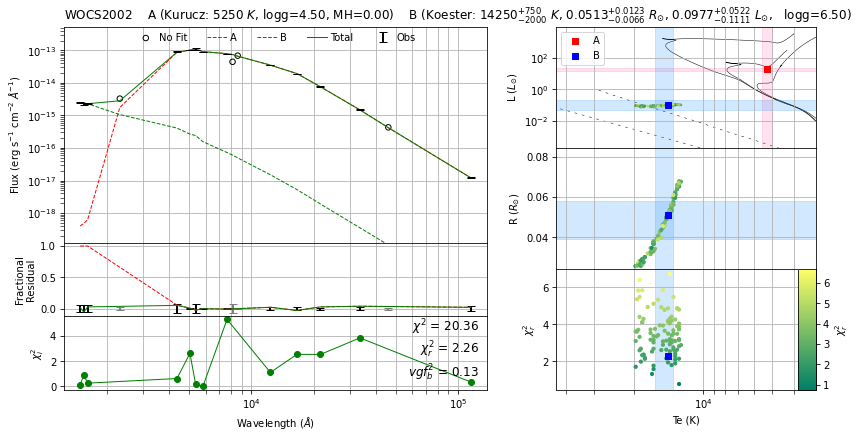

In [4]:
binary_2002.read_model_file(verbose=False)

limits = {'Te_B'              :[8000, 30000],
          'logg_B'            :[6.5, 9.5]}
binary_2002.constrain_fitting_parameters(limits, verbose= False)
# range of radii for B component
binary_2002.create_sf_list(R_B_min=0.001, R_B_max=1., log_sf_stepsize=0.01)

binary_2002.calculate_chi2(cycle, refit=True)
binary_2002.get_parameters_from_chi2_minimization()
binary_2002.plot_fitted_SED(cycle)

binary_2002.calculate_chi2_noisy(cycle, refit=True)
binary_2002.get_parameters_from_noisy_chi2()
binary_2002.plot_fitted_noisy_SED(cycle,plot_noisy_SEDs=False)
binary_2002.save_object(cycle=cycle)

# Double star fitting - Example 2
Using `VOSA` fitted A component

## Loading the `VOSA` file and creating a BinaryStar

In [5]:
cycle=2

binary_2002 = initialise_BinaryStar_from_VOSA(name            = 'WOCS2002', 
                                              model_to_fit_A  = 'Kurucz', 
                                              model_to_fit_B  = 'Koester', 
                                              dir_obs         = 'data/vosa_results_53985/objects/',
                                              distance        = 831.76,
                                              distance_err    = 11,
                                              free_para       = 2, 
                                              filters_to_drop = ['GALEX/GALEX.NUV','WISE/WISE.W3','KPNO/Mosaic.I','GAIA/GAIA3.Grvs'], 
                                              verbose         = True)


    RUNNING: drop_filters 
                    not_fitted         to_be_fitted
wavelength                                         
1481.000000                     Astrosat/UVIT.F148W
1541.000000                     Astrosat/UVIT.F154W
1608.000000                     Astrosat/UVIT.F169M
2303.366368    GALEX/GALEX.NUV                     
4357.276538                           KPNO/Mosaic.B
5035.750275                          GAIA/GAIA3.Gbp
5366.240786                           KPNO/Mosaic.V
5822.388714                            GAIA/GAIA3.G
7619.959993                          GAIA/GAIA3.Grp
8101.609574      KPNO/Mosaic.I                     
8578.159519    GAIA/GAIA3.Grvs                     
12350.000000                          2MASS/2MASS.J
16620.000000                          2MASS/2MASS.H
21590.000000                         2MASS/2MASS.Ks
33526.000000                           WISE/WISE.W1
46028.000000                           WISE/WISE.W2
115608.000000     WISE/WISE.W3      

## Chi2 fitting and plotting

    Calculating noisy chi2:  99/100  (99%)    WARNING: Best fit logg is at lower limit of the model.
    Saving log in log_binary_fitting.csv


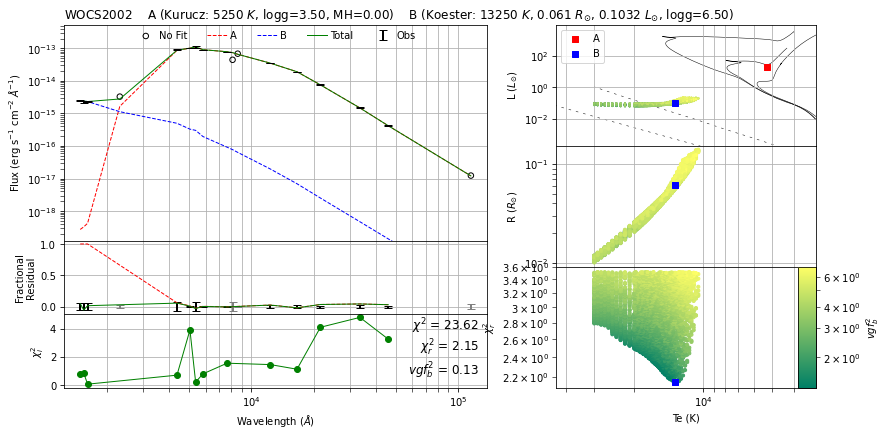

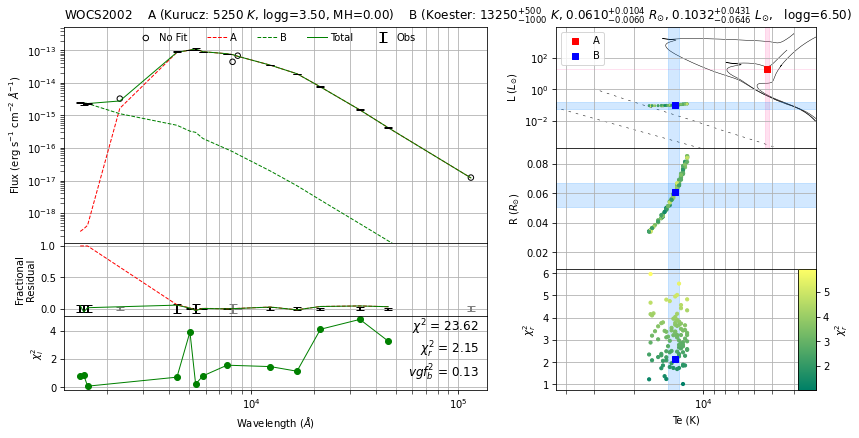

In [6]:
binary_2002.read_model_file(verbose=False)

limits = {'Te_B'              :[8000, 30000],
          'logg_B'            :[6.5, 9.5]}
binary_2002.constrain_fitting_parameters(limits)
binary_2002.create_sf_list(R_B_min=0.001, R_B_max=1., log_sf_stepsize=0.01)
binary_2002.create_star_dataarrays()

binary_2002.calculate_chi2(cycle, refit=True)
binary_2002.get_parameters_from_chi2_minimization()
binary_2002.plot_fitted_SED(cycle,save_plot=True)

binary_2002.calculate_chi2_noisy(cycle, refit=True)
binary_2002.get_parameters_from_noisy_chi2()
binary_2002.plot_fitted_noisy_SED(cycle, plot_noisy_SEDs=False)
binary_2002.save_object(cycle)